<a href="https://colab.research.google.com/github/jakubdaron/MTR_optymalizacja/blob/main/Problem_RPQ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[[ 23  37 107]
 [ 92  39 145]
 [ 99  29  15]
 [ 99  13 217]
 [106   8  83]
 [119  14 128]
 [140   6 107]
 [153   9 273]
 [162  27 145]
 [166   3  40]
 [177  24 122]
 [179  14 254]
 [256  42 106]
 [269   1  48]
 [273  30 206]
 [290  47   1]
 [295   5 107]
 [298  31  82]
 [310  22  24]
 [311   9 158]]
Cmax: 465


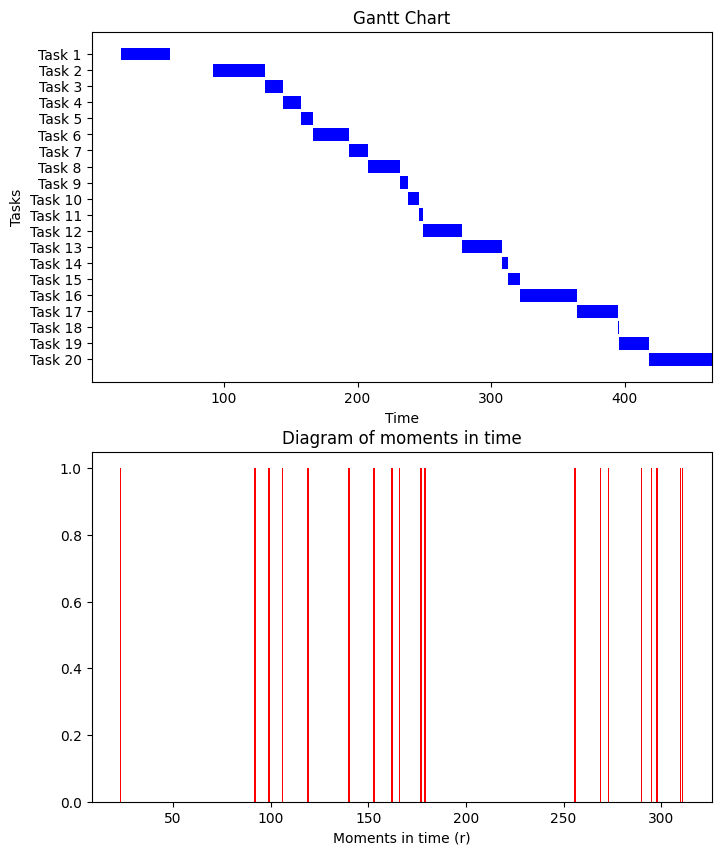

In [35]:
import random
import numpy as np
import matplotlib.pyplot as plt

def generate_sorted_rpq_table(n, F):
    rpq = []
    # generate random r, p, q values
    for i in range(n):
        r = random.randint(0, n*F)
        p = random.randint(1, 50)
        q = random.randint(0, n*F)
        rpq.append([r, p, q])

    # sort rpq table in increasing order of r values
    rpq = np.array(rpq)
    sorted_rpq = rpq[rpq[:, 0].argsort()]
    #sorted_rpq = np.array([[6, 4, 2], [6, 8, 3], [10, 2, 3], [12, 3, 0]])
    return sorted_rpq

def add_and_sort_bufor(sorted_rpq, iteration, bufor_queue):
    bufor = sorted_rpq[iteration].tolist()
    bufor_queue.append(bufor)
    bufor_queue = np.array(bufor_queue)

    # sort bufor_queue in decreasing order of q values
    sorted_bufor = bufor_queue[bufor_queue[:, 2].argsort()[::-1]]
    bufor_queue = sorted_bufor.tolist()
    return bufor_queue

def plot_gantt_chart(ax, schedule):
    tasks = [f'Task {i+1}' for i in range(len(schedule))]

    for i, task in enumerate(schedule):
        schedule[i][1], schedule[i][0] = task
        ax.barh(tasks[i], schedule[i][1] - schedule[i][0], left=schedule[i][0], color='blue')

    ax.set_xlabel('Time')
    ax.set_ylabel('Tasks')
    ax.set_title('Gantt Chart')
    ax.invert_yaxis()  # Invert the y-axis to have Task 1 at the top

def print_r(ax, sorted_rpq):
    y = [1] * len(sorted_rpq)
    x = sorted_rpq[:, 0]

    ax.bar(x, y, color='red')

    ax.set_xlabel('Moments in time (r)')
    ax.set_title('Diagram of moments in time')

def optimise_function(sorted_rpq, n):

    schedule = []

    iteration = 0
    bufor_queue = []
    current_task = 0
    time = 0
    end_iteration = 0
    end_def = 0

    while end_def == 0:
        #print(current_task)
        if time == sorted_rpq[iteration, 0]:
            while True:
                bufor_queue = add_and_sort_bufor(sorted_rpq, iteration, bufor_queue)
                if iteration < n-1:
                    iteration += 1
                else:
                    end_iteration = 1

                if sorted_rpq[iteration, 0] != sorted_rpq[iteration-1, 0]:
                    break

        if current_task <= 0 and bufor_queue:
            current_task = bufor_queue[0][1]
            schedule.append([time, time+bufor_queue[0][1]])
            bufor_queue.pop(0)

        #print(f"time: {time}, current_task: {current_task}, bufor_queue: {bufor_queue}")
        #print(f"time: {time}, current_task: {current_task}")
        time += 1
        current_task -= 1

        if end_iteration == 1:
            if current_task == 0 and len(bufor_queue) == 0:
                end_def = 1

    Cmax = time
    print(f'Cmax: {Cmax}')
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 10))
    plot_gantt_chart(ax1, schedule)
    print_r(ax2, sorted_rpq)
    plt.show()

if __name__ == "__main__":
    F = 17
    n = 20
    sorted_rpq = generate_sorted_rpq_table(n, F)
    print(sorted_rpq)
    optimise_function(sorted_rpq, n)


